# 20210828 Initial Analysis

In [105]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns

from imaka.reduce import util
from astropy.stats import sigma_clipped_stats
import imaka.analysis.moffat as moffat
## Edit Me
from imaka.reduce.nights import reduce_2021_08_28 as redu
night = '20210828'
fld = 'Fld2'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from importlib import reload

In [135]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
## Had an issue with stacking, the gfol
for key in list(redu.dict_images.keys()):
    for i in range(len(redu.dict_images[key])):
        img_num = redu.dict_images[key]
        suf = redu.dict_suffix[key]
        test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)
        
        stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars_stats_mdp.fits')
        print(f"key: {key} image {img_num[i]} stars: {len(stars)}")  

key: LS_IVBR image 12 stars: 2390
key: LS_IVBR image 15 stars: 2447
key: LS_IVBR image 18 stars: 2736
key: LS_IVBR image 21 stars: 2921
key: LS_IVBR image 24 stars: 2262
key: LS_IVBR image 27 stars: 2531
key: LS_IVBR image 30 stars: 2099
key: LS_IVBR image 33 stars: 2765
key: LS_IVBR image 37 stars: 2785
key: docz_IVBR image 13 stars: 2610
key: docz_IVBR image 16 stars: 2276
key: docz_IVBR image 19 stars: 2512
key: docz_IVBR image 22 stars: 2537
key: docz_IVBR image 25 stars: 2526
key: docz_IVBR image 28 stars: 2667
key: docz_IVBR image 31 stars: 2635
key: docz_IVBR image 34 stars: 2713
key: docz_IVBR image 38 stars: 2878
key: open_IVBR image 14 stars: 1362
key: open_IVBR image 17 stars: 1379
key: open_IVBR image 20 stars: 883
key: open_IVBR image 26 stars: 1294
key: open_IVBR image 29 stars: 693
key: open_IVBR image 32 stars: 1015
key: open_IVBR image 35 stars: 916
key: open_IVBR image 39 stars: 1152
key: tt_IVBR image 36 stars: 1788
key: tt_IVBR image 40 stars: 1577
key: LS_VBRI imag

# Single Image plots

In [16]:
# pick a file based on key
key = 'LS_IVBR'
i=1
###
img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

50% EE radius = 0.400"


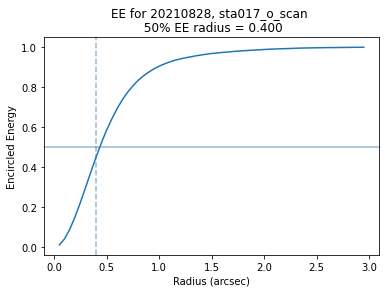

In [8]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

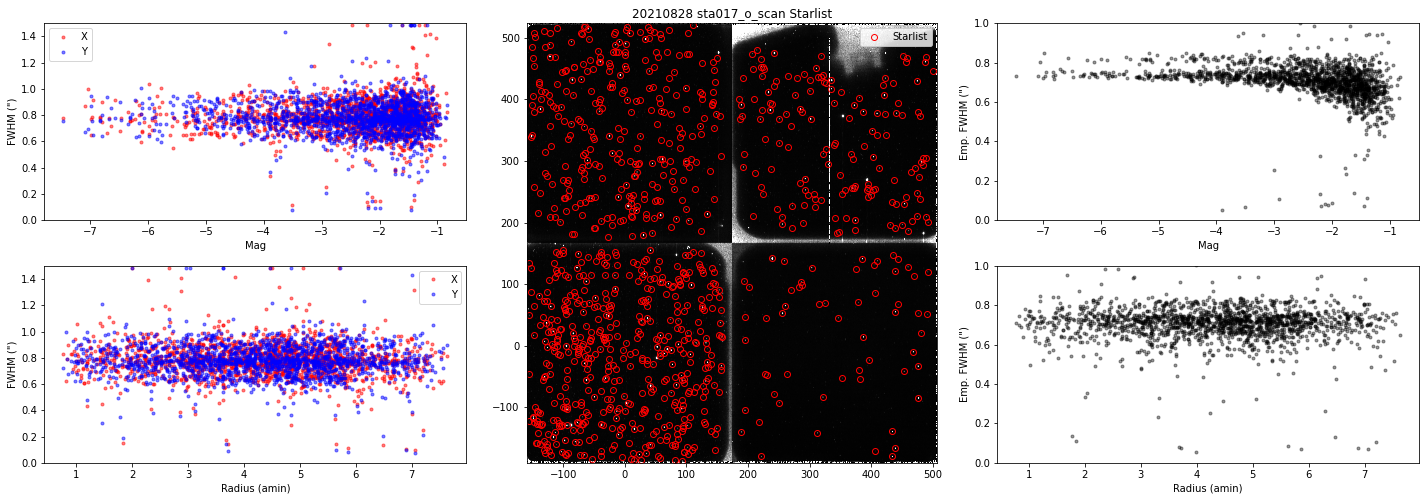

x: fwhm_x_avg = 0.78" fwhm_x_med = 0.78" fwhm_x_std = 0.10"
x: fwhm_x_avg = 0.78" fwhm_x_med = 0.78" fwhm_x_std = 0.10"


In [9]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

NOTE: extra stars on top edge and low edges here look like noise. Filtering starlists is advised

# STATS

## Moffat profile

In [7]:
stats = Table.read(root_dir + 'reduce/stats/stats_LS_IVBR.fits')

In [11]:
reload(plot_redu)

<module 'imaka.analysis.plot_redu' from '/u/eden/code/imaka/imaka/analysis/plot_redu.py'>

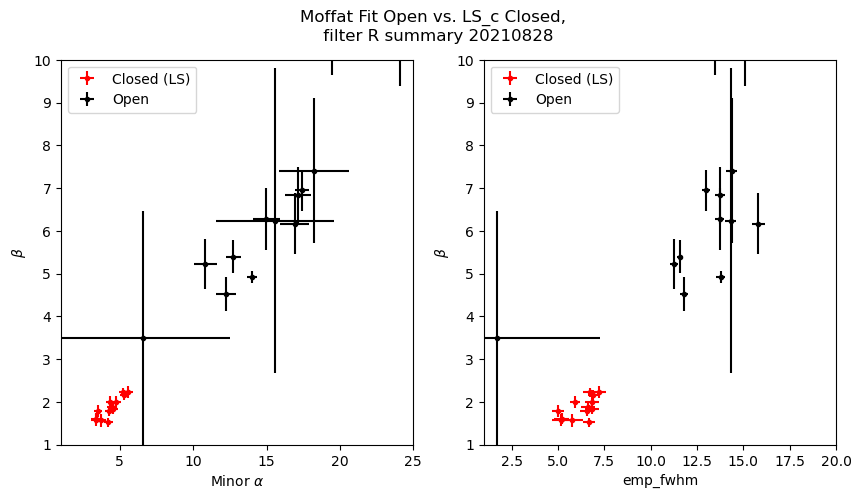

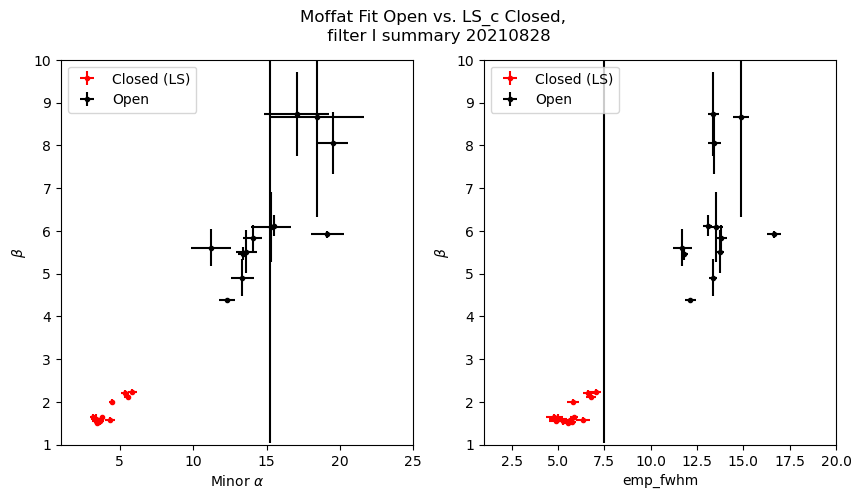

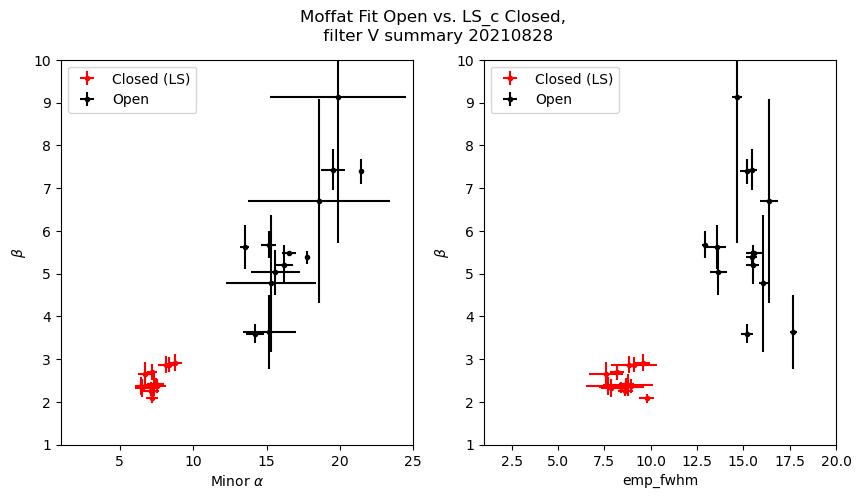

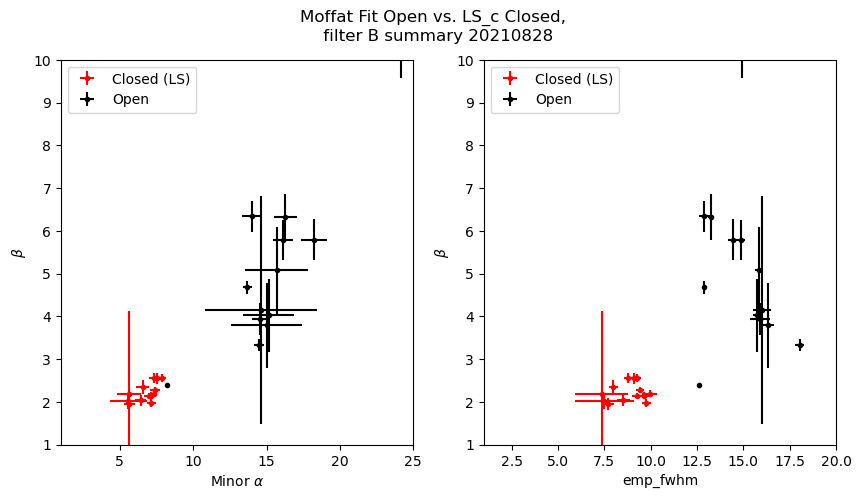

In [48]:
c_key = "LS_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

### Beta vs. Mag

Text(0.5, 0.98, 'Moffat Fit Open vs.Closed, \n 20210828 STACK for LS_c filter order IVBR')

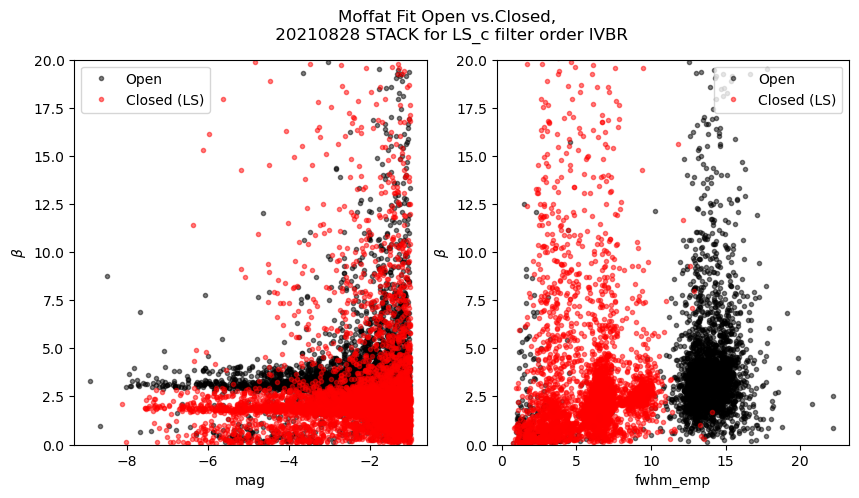

In [43]:
# Stacked image moffat fit values
c_key = "LS_c"
filt_key = "IVBR"
stats_c = Table.read(f'{root_dir}reduce/stacks/fld2_stack_{c_key}_{filt_key}_stars_stats_mdp.fits')
stats_o = Table.read(f'{root_dir}reduce/stacks/fld2_stack__o_{filt_key}_stars_stats_mdp.fits')

plt.figure(figsize=(10,5))
plt.clf()
plt.subplot(121)
plt.errorbar(stats_o['mag'], stats_o['Beta'],  fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['mag'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)
plt.xlabel(r'mag')
plt.ylabel(r'$\beta$')
plt.ylim(0,20)
plt.legend()

plt.subplot(122)
plt.errorbar(stats_o['fwhm_emp'], stats_o['Beta'], fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['fwhm_emp'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)

plt.xlabel(r'fwhm_emp')
plt.ylabel(r'$\beta$')
plt.legend()
plt.ylim(0,20)

plt.suptitle(f"Moffat Fit Open vs.Closed, \n {night} STACK for {c_key} filter order {filt_key}")

[]

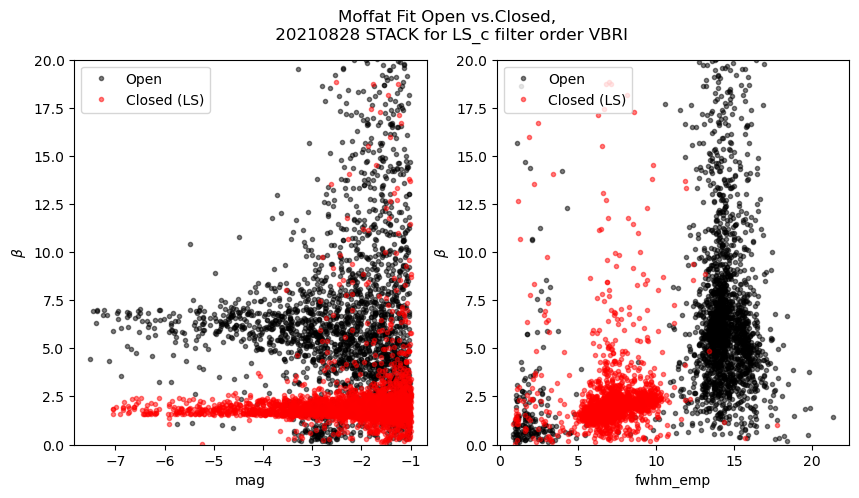

In [45]:
# Stacked image moffat fit values
c_key = "LS_c"
filt_key = "VBRI"
stats_c = Table.read(f'{root_dir}reduce/stacks/fld2_stack_{c_key}_{filt_key}_stars_stats_mdp.fits')
stats_o = Table.read(f'{root_dir}reduce/stacks/fld2_stack__o_{filt_key}_stars_stats_mdp.fits')

plt.figure(figsize=(10,5))
plt.clf()
plt.subplot(121)
plt.errorbar(stats_o['mag'], stats_o['Beta'],  fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['mag'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)
plt.xlabel(r'mag')
plt.ylabel(r'$\beta$')
plt.ylim(0,20)
plt.legend()

plt.subplot(122)
plt.errorbar(stats_o['fwhm_emp'], stats_o['Beta'], fmt='k.', label='Open', alpha=0.5)
plt.errorbar(stats_c['fwhm_emp'], stats_c['Beta'],  fmt='r.', label='Closed (LS)', alpha=0.5)

plt.xlabel(r'fwhm_emp')
plt.ylabel(r'$\beta$')
plt.legend()
plt.ylim(0,20)

plt.suptitle(f"Moffat Fit Open vs.Closed, \n {night} STACK for {c_key} filter order {filt_key}")
plt.plot()

### $Beta$ vs FWHM, 4F Individual images
This looks at the combined individual images and standard deviation on them. 

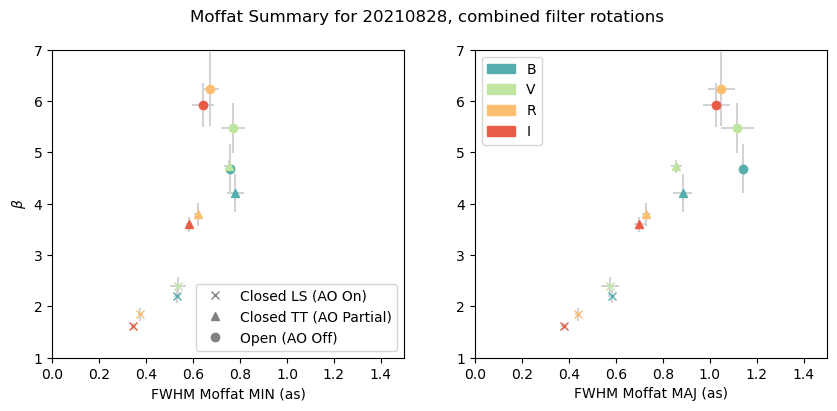

In [121]:
plot_redu.plot_fwhm_beta_4F_frames(redu)

### $Beta$ vs FWHM, 4F Stacked images
This looks at the stackes images and standard deviation calculated in the moffat fitting. 

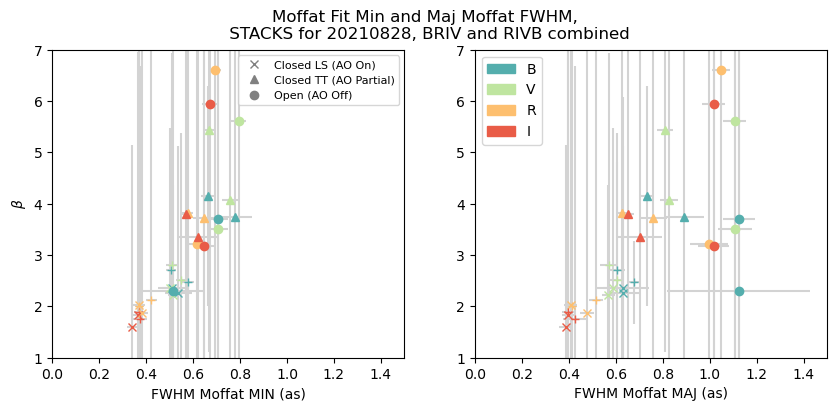

In [131]:
plot_redu.plot_fwhm_beta_4F_stack_sum(redu)

### Jitter: Difference between MIN and MAJ
Here we look at the impact of jitter by comparing major and minor axes

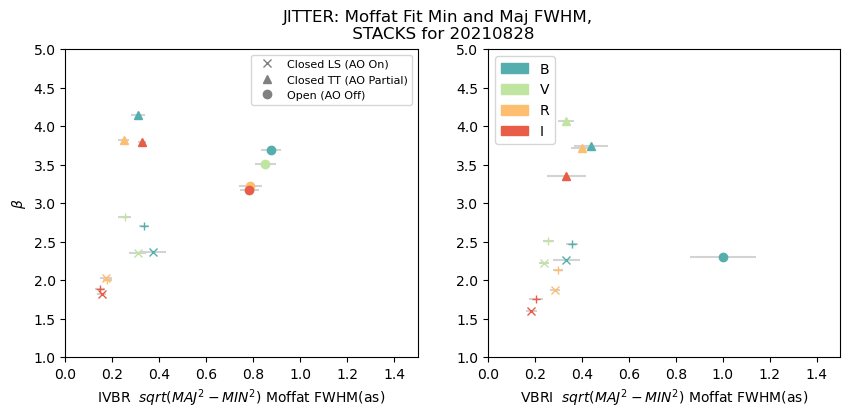

In [132]:
plot_redu.plot_jitter_4F_stack_sum(redu)

### FA vs. FWHM
Here we want to know how the seperation from center affects FWHM from the stacked image starlists. 

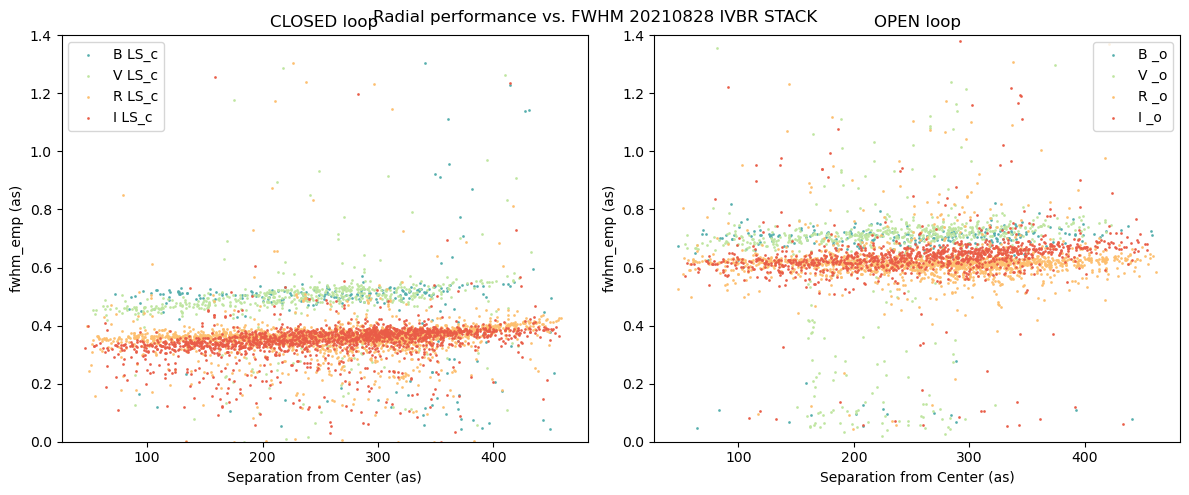

In [142]:
plot_redu.plot_fwhm_sep_4F_stacks(redu, c_key = 'LS_c', odr ='IVBR')

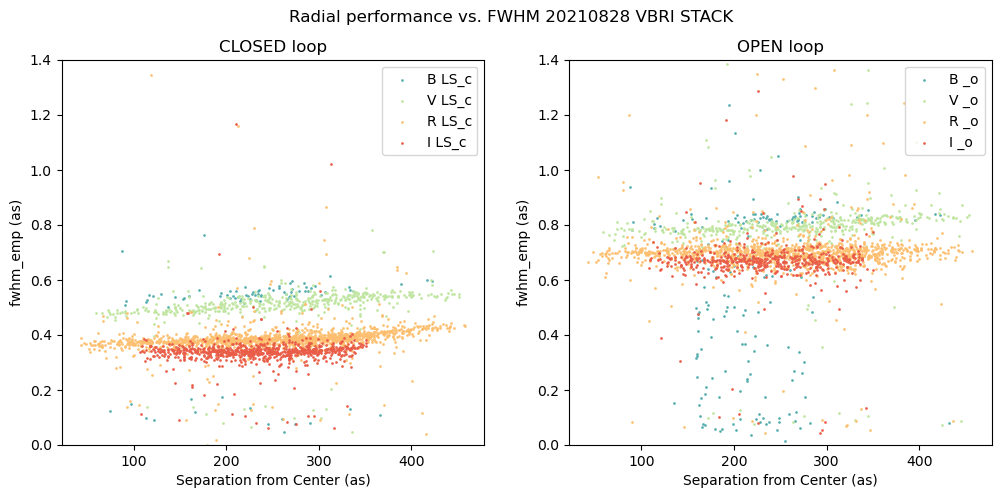

In [143]:
plot_redu.plot_fwhm_sep_4F_stacks(redu, c_key = 'LS_c', odr ='VBRI')

## Stats Stacking

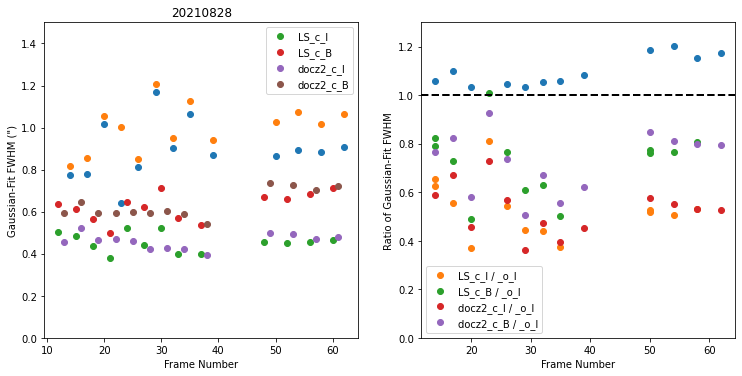

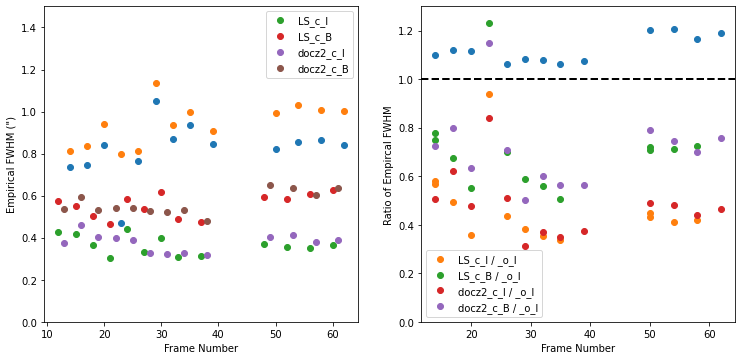

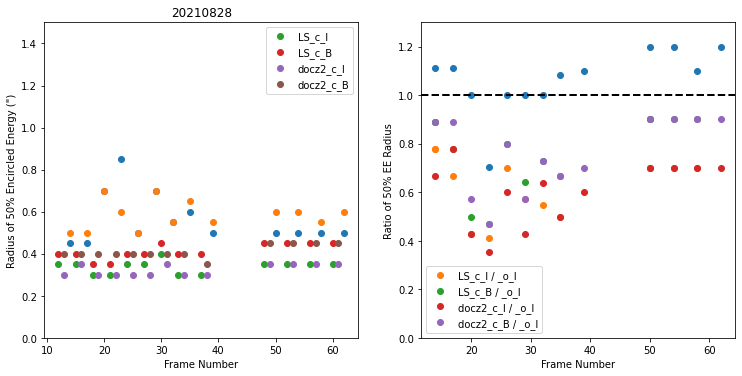

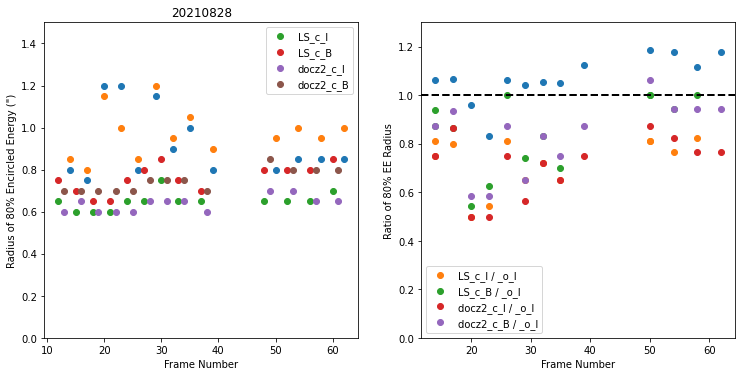

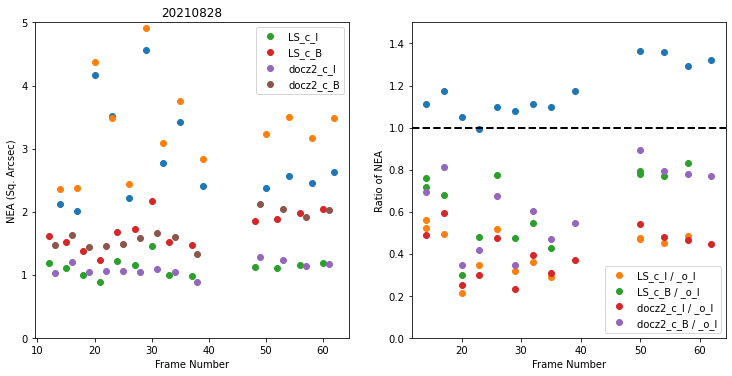

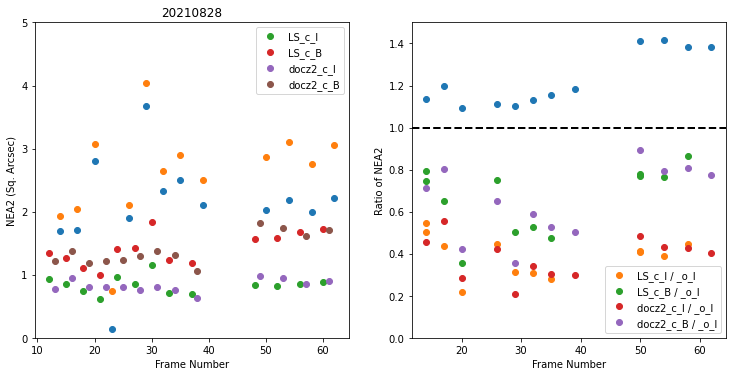

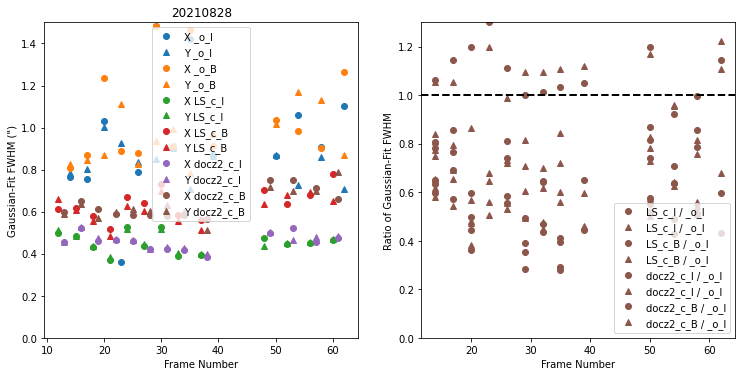

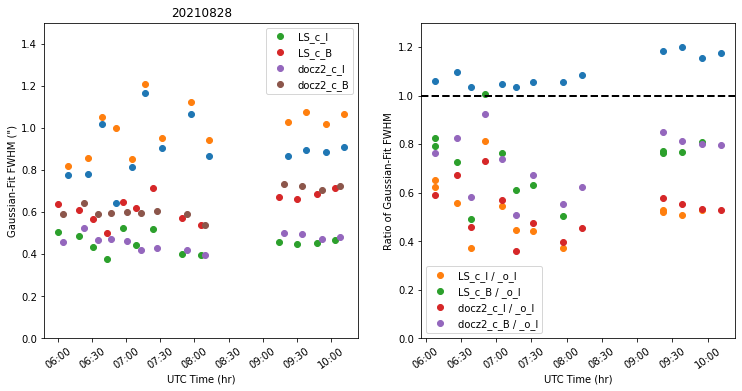

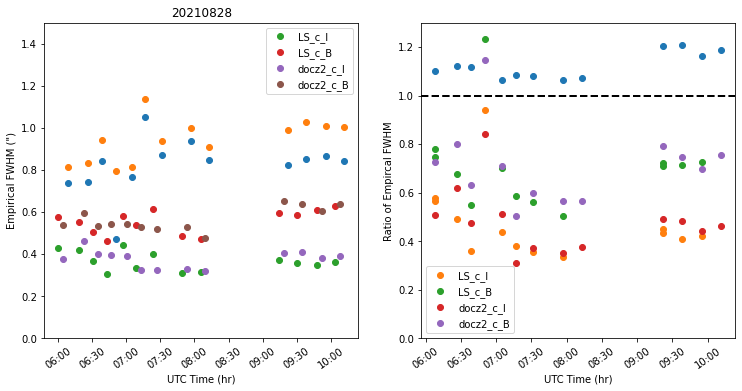

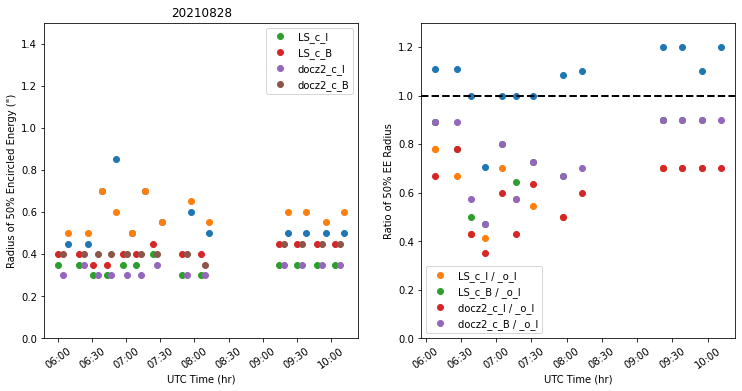

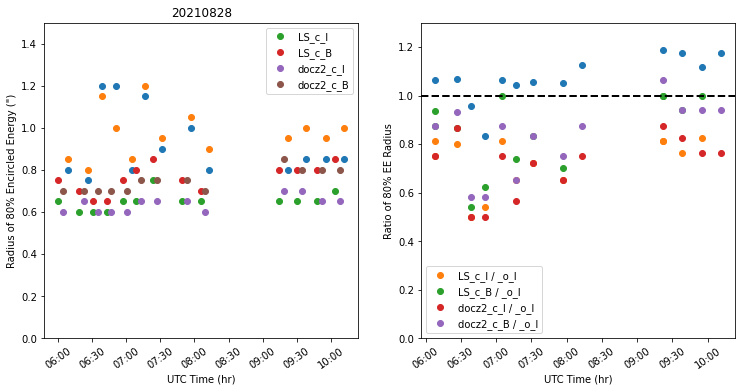

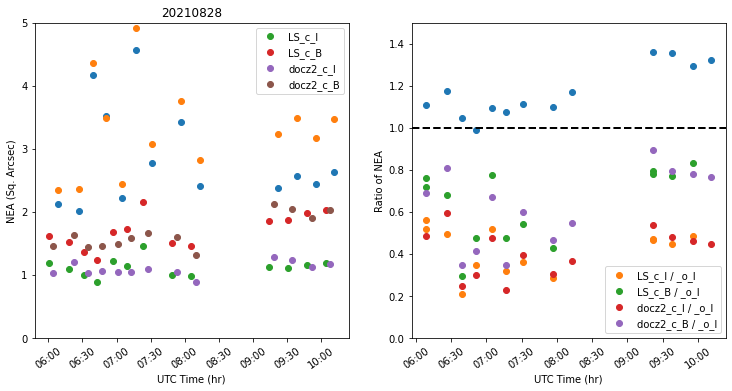

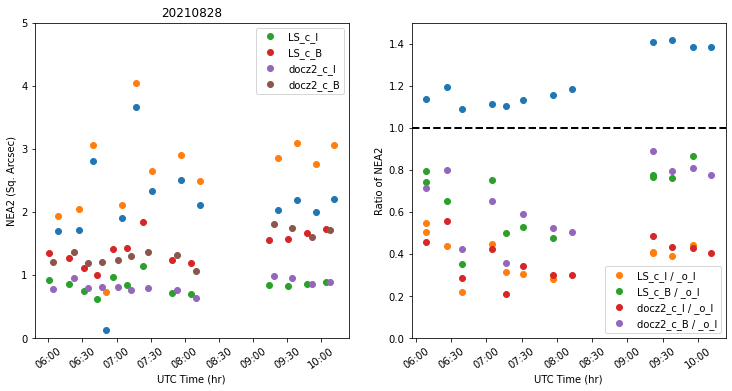

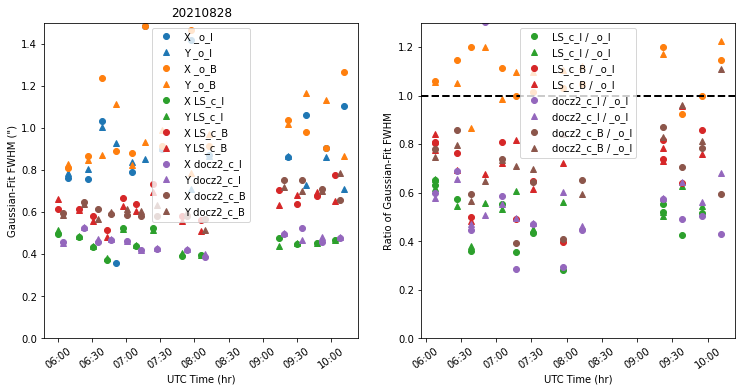

In [14]:
## Must have completed stats
suffixes = list(redu.dict_suffix.keys())
suffixes = ['_o_I', '_o_B', 'LS_c_I', 'LS_c_B', 'docz2_c_I', 'docz2_c_B']
plot_stats.plot_stack_stats(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

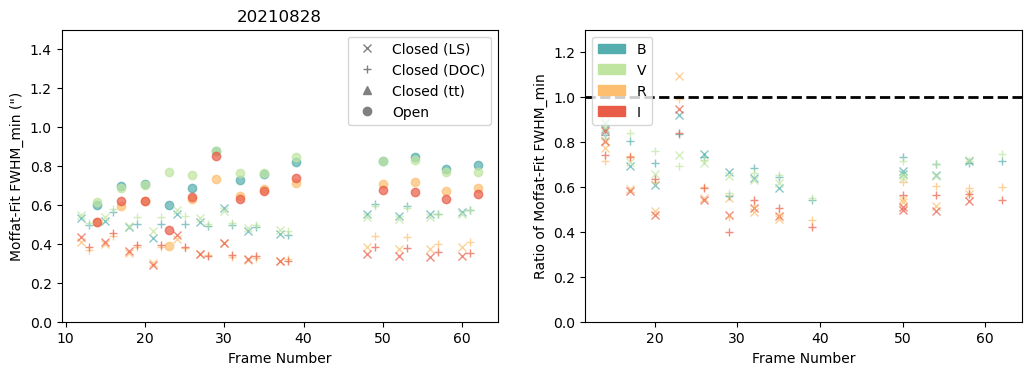

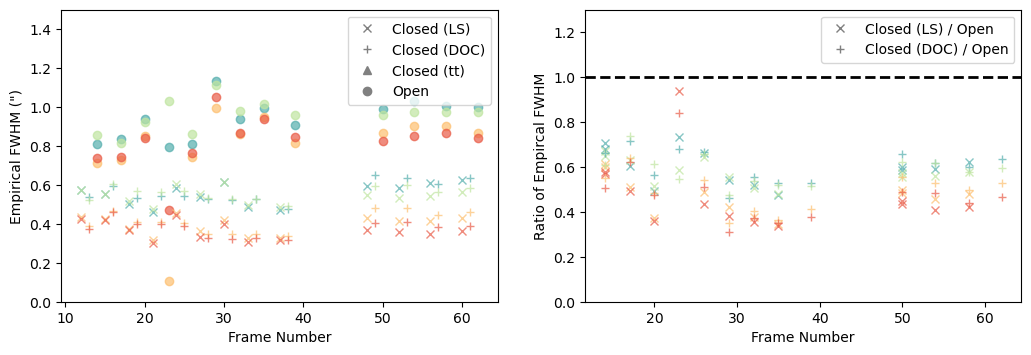

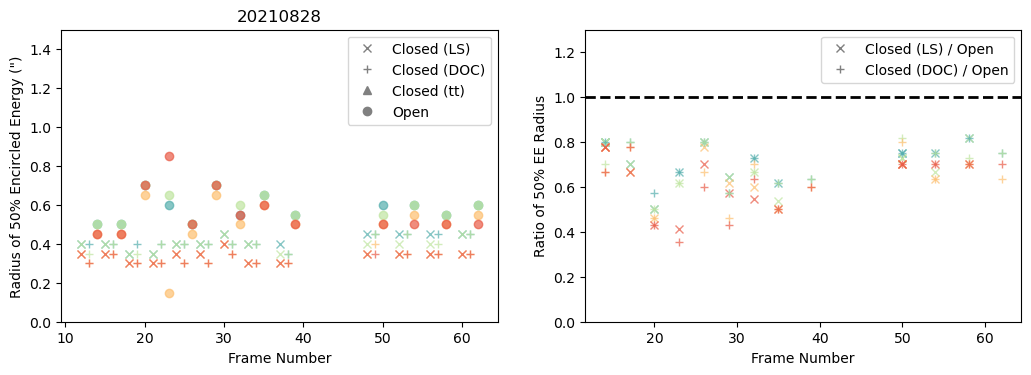

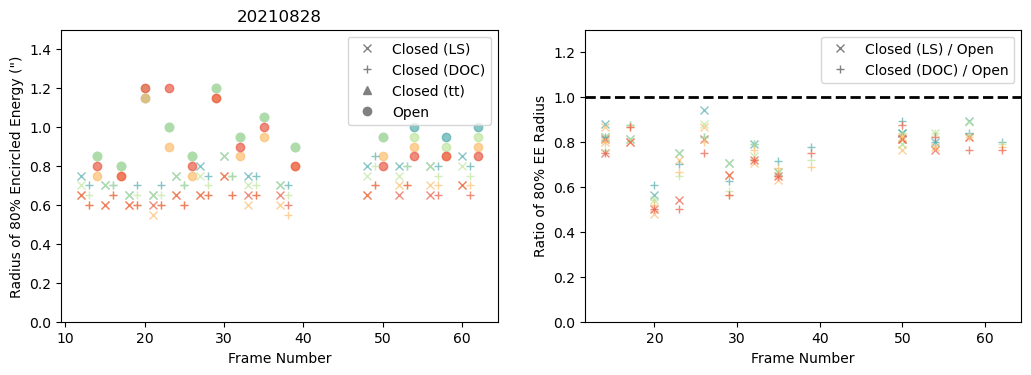

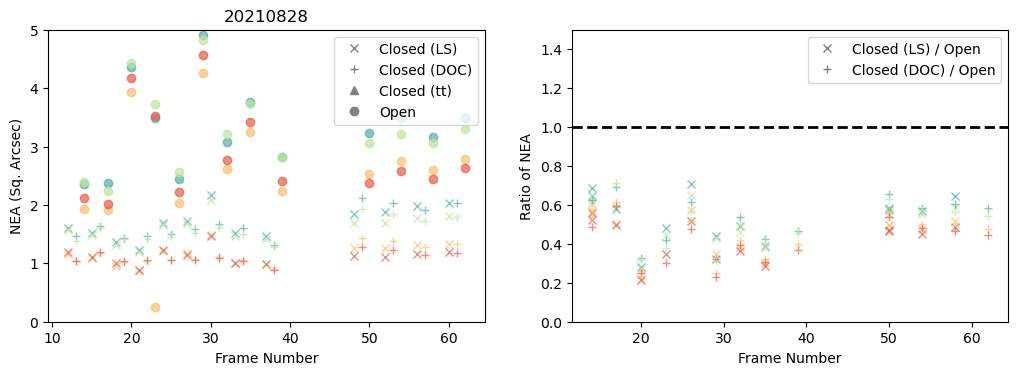

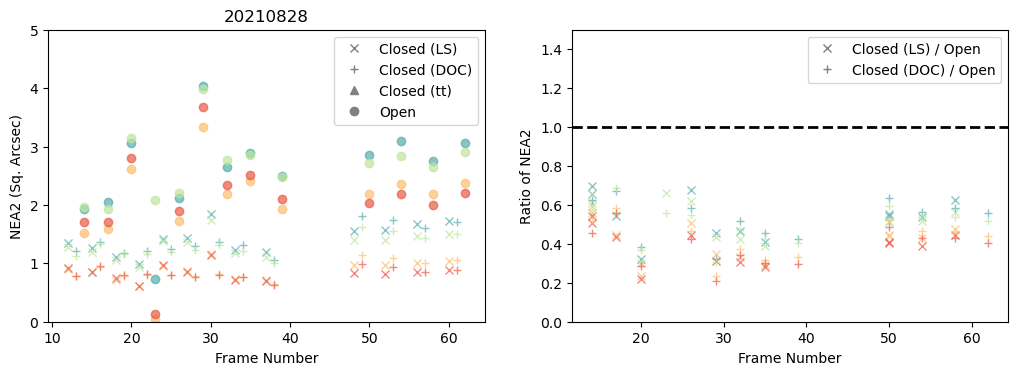

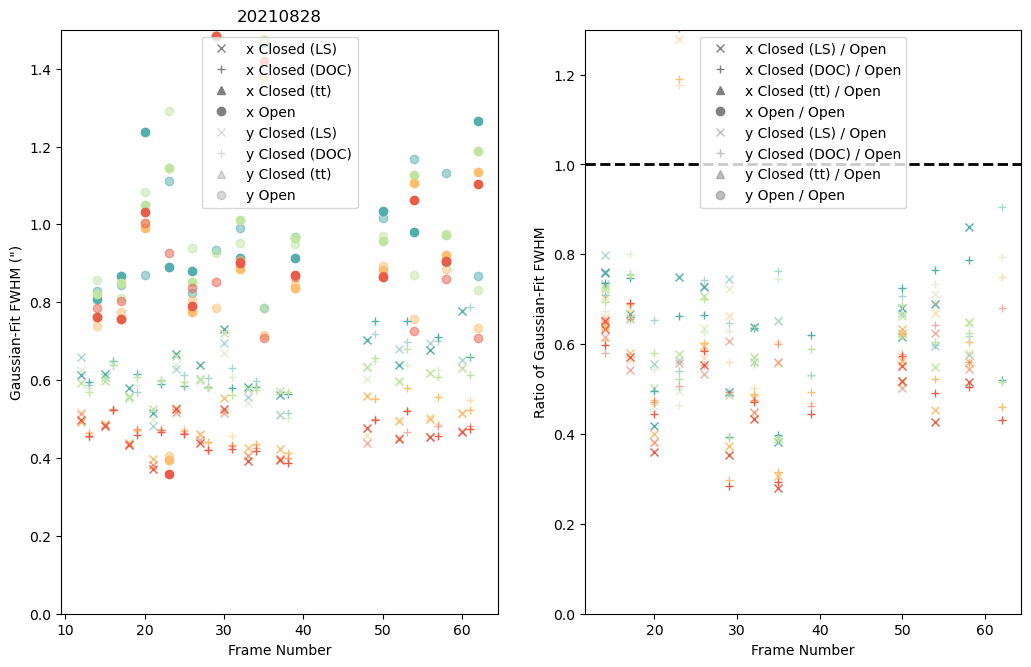

In [122]:
reload(plot_redu)
suffixes = ['_o', 'LS_c', 'docz2_c'] #'tt_c'
plot_redu.plot_stack_stats_4F_frame(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

# Time Variation w/MASS-DIMM

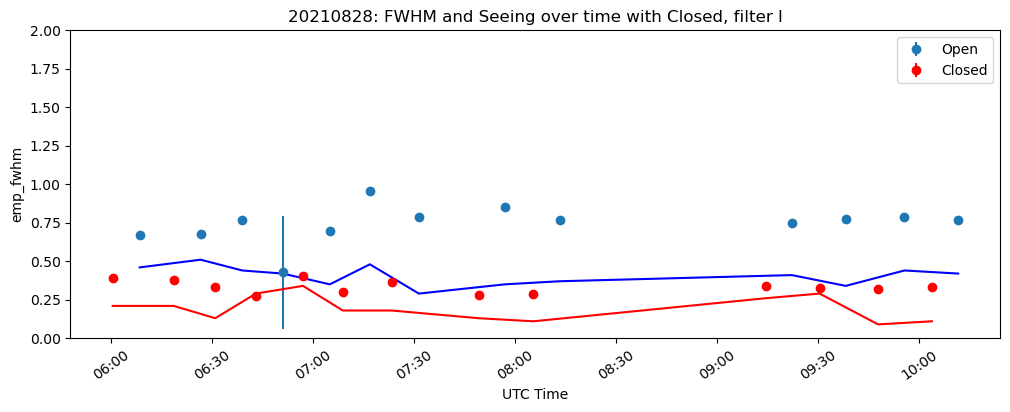

In [2]:
filt = "I"
wav = 806

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

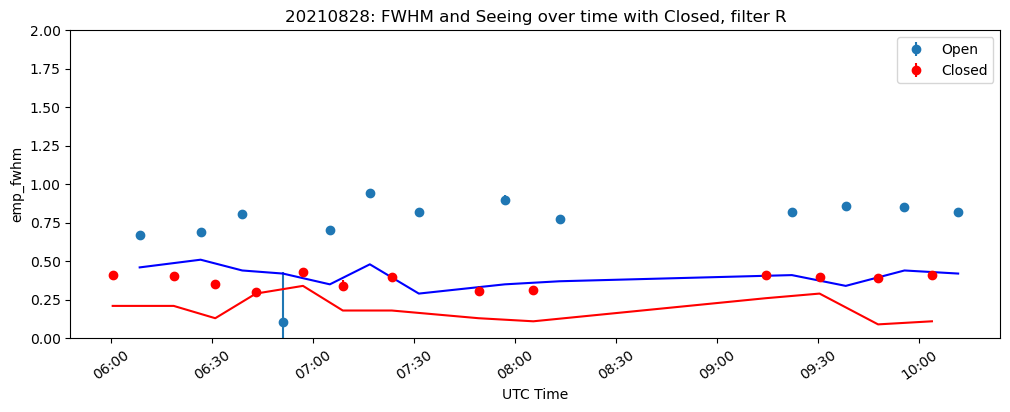

In [3]:
filt = "R"
wav = 658

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

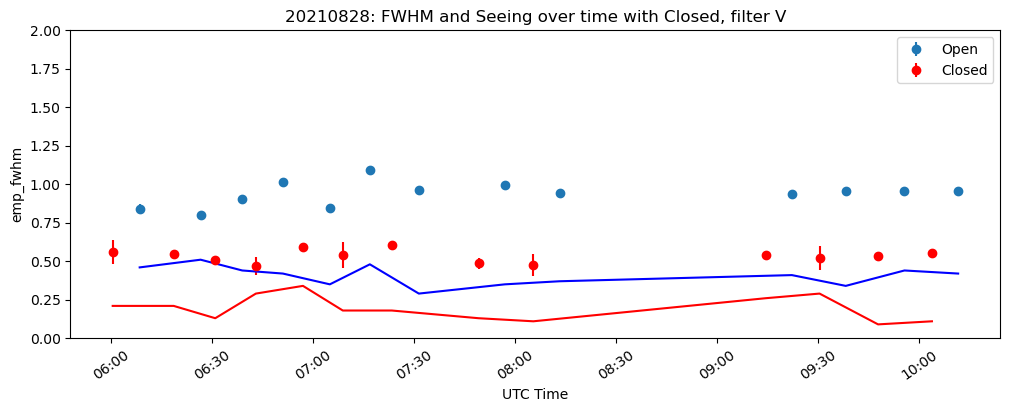

In [4]:
filt = "V"
wav = 551

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

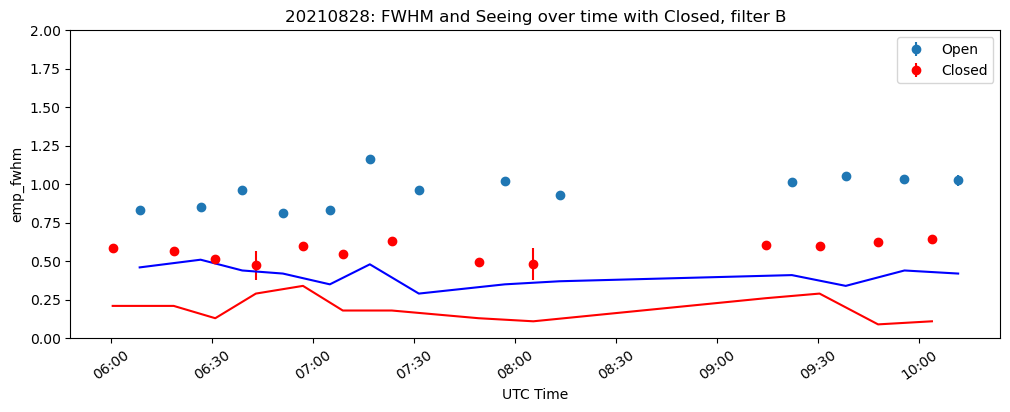

In [5]:
filt = "B"
wav = 445

open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

# Aggregate Plots

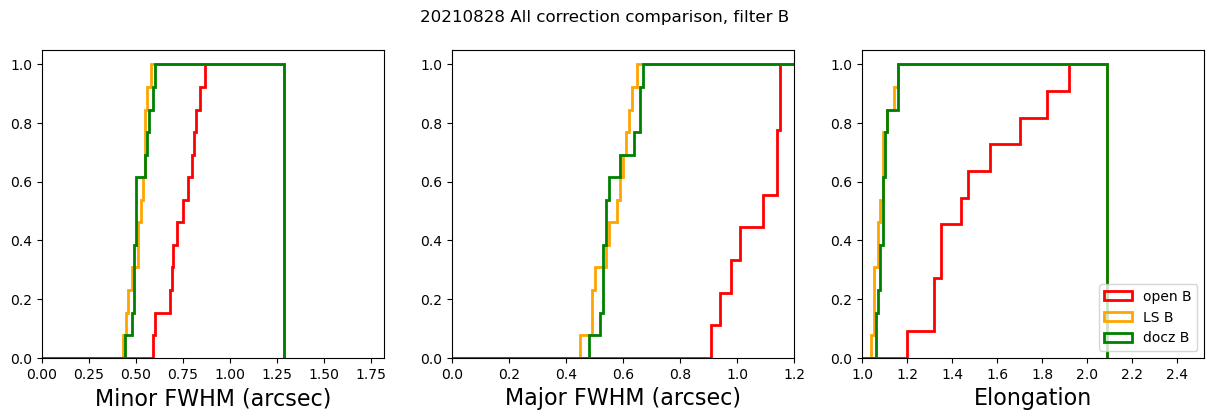

In [8]:
f_band = "B"

files = [f"{stats_dir}stats__o_{f_band}_mdp.fits", f"{stats_dir}stats_LS_c_{f_band}_mdp.fits", f"{stats_dir}stats_docz2_c_{f_band}_mdp.fits"]
labels = ['open '+ f_band, 'LS ' + f_band, 'docz ' + f_band]
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All correction comparison, filter {f_band}")
plt.show()

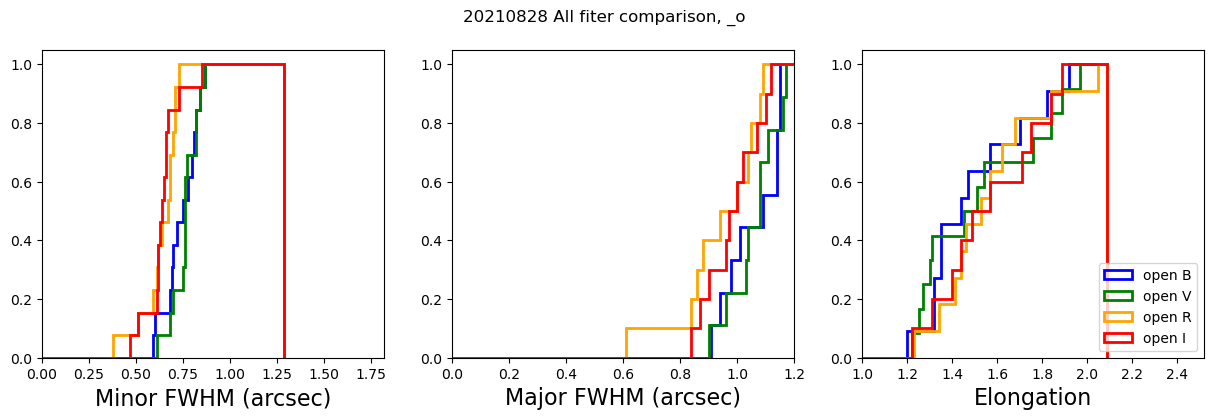

In [9]:
suff = "_o"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['open B', 'open V', 'open R', 'open I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

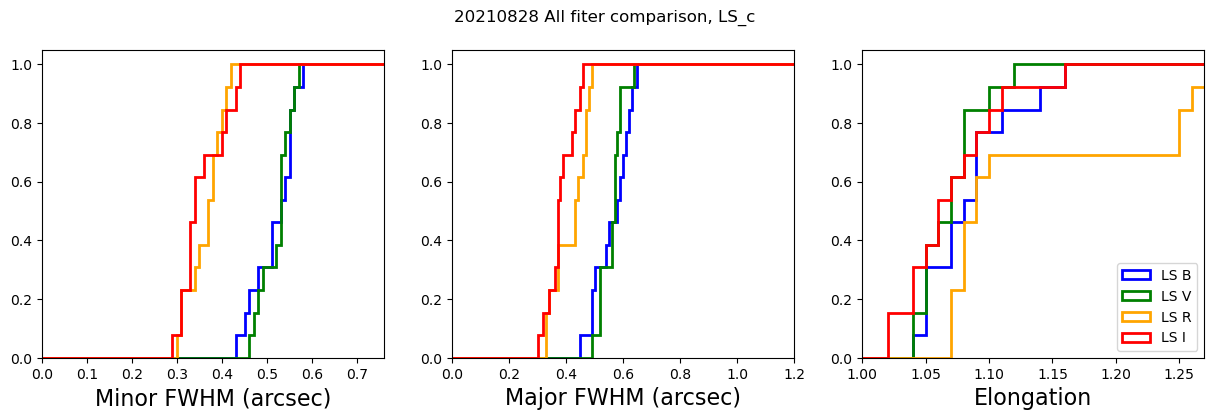

In [10]:
suff = "LS_c"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['LS B', 'LS V', 'LS R', 'LS I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

# Four Filter Analysis

In [12]:
from imaka.analysis import fourfilt
root = stats_dir

files_c = [root+"stats_LS_c_B.fits", root+"stats_LS_c_V.fits", root+"stats_LS_c_R.fits", root+"stats_LS_c_I.fits"]
files_o = [root+"stats__o_B.fits", root+"stats__o_V.fits", root+"stats__o_R.fits", root+"stats__o_I.fits"]

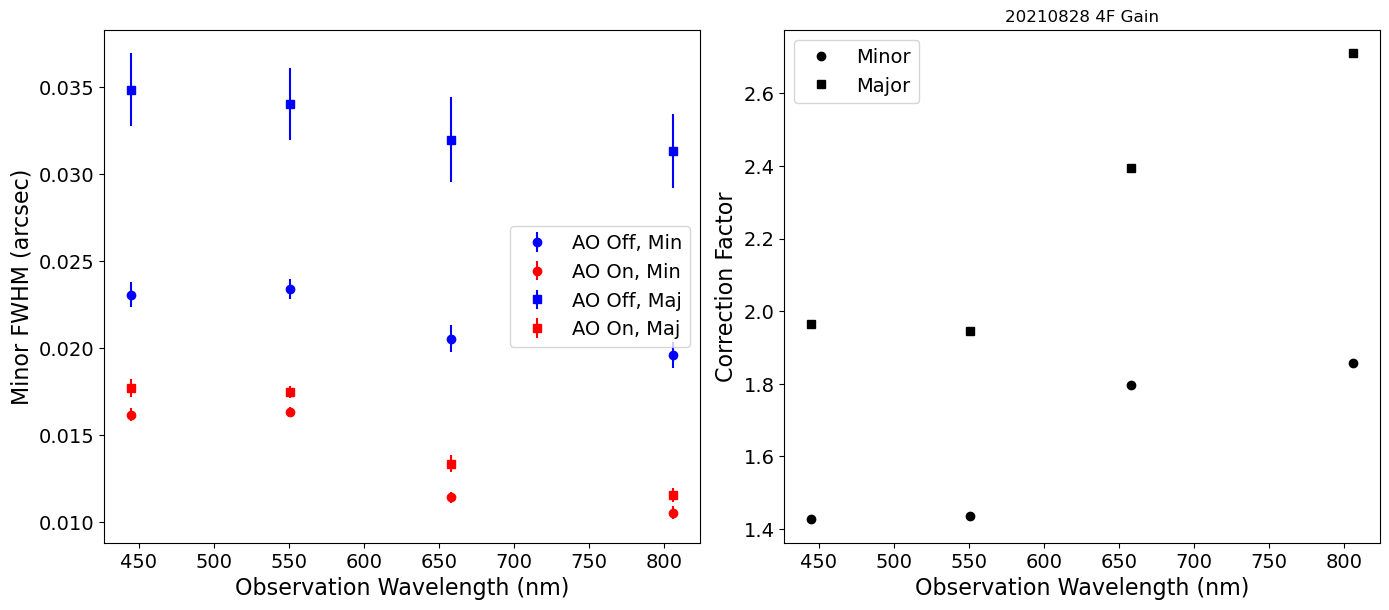

In [13]:
fourfilt.plot_gain(files_o, files_c) 
plt.title(f"{night} 4F Gain")
plt.show()

χ$^2$=5.58
χ$^2$=59.09
α=0.31
α=0.82


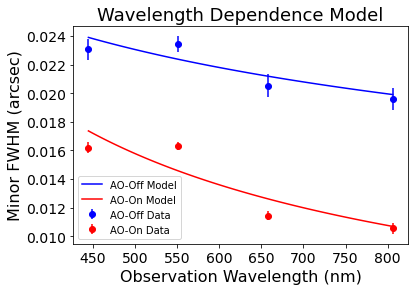

In [24]:
fourfilt.power_model(files_o, files_c)

# Field Variability

In [21]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

### Closed loop, single exposure

sta063tt_c_scan
Median FWHM           = 0.624"
Median FWHM (clipped) = 0.624"
Mean FWHM             = 0.669"
Mean FWHM (clipped)   = 0.637"
Stddev FWHM           = 1.175"
Stddev FWHM (clipped) = 0.057"


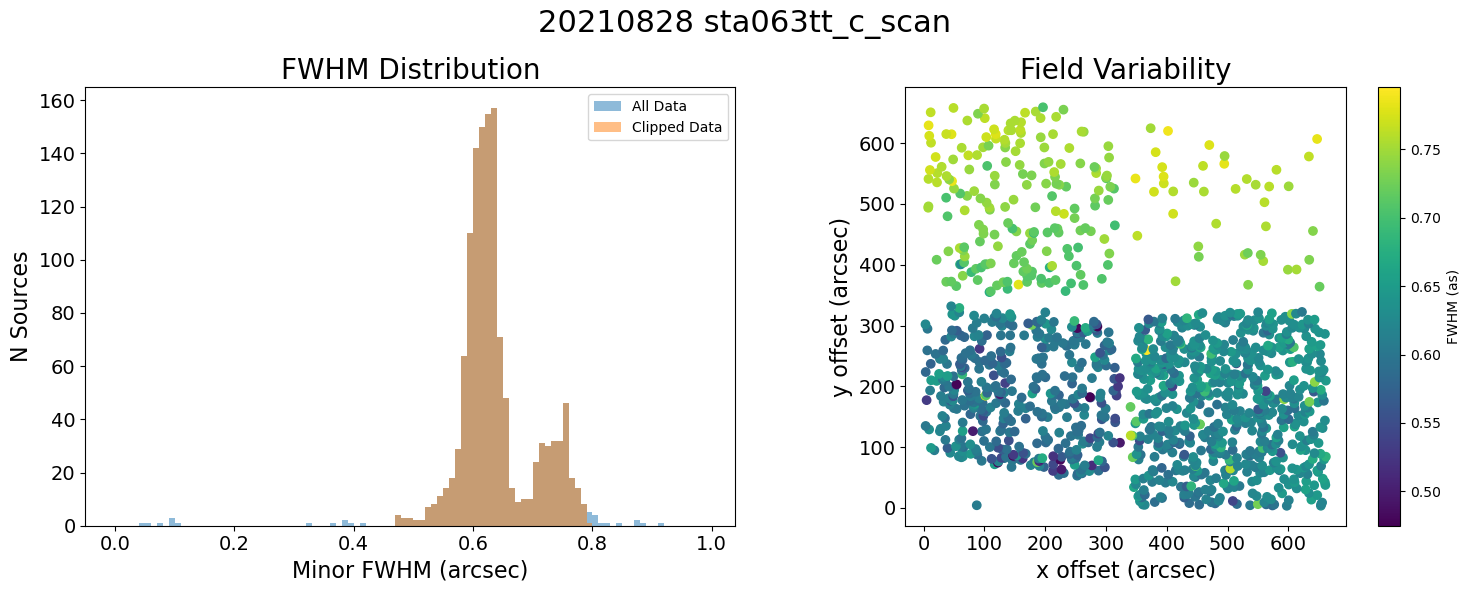

In [32]:
#test_img_base = "sta019LS_c_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, night +" "+ test_img_base )

### Open Loop

Median FWHM           = 0.629"
Median FWHM (clipped) = 0.629"
Mean FWHM             = 0.672"
Mean FWHM (clipped)   = 0.642"
Stddev FWHM           = 0.754"
Stddev FWHM (clipped) = 0.053"


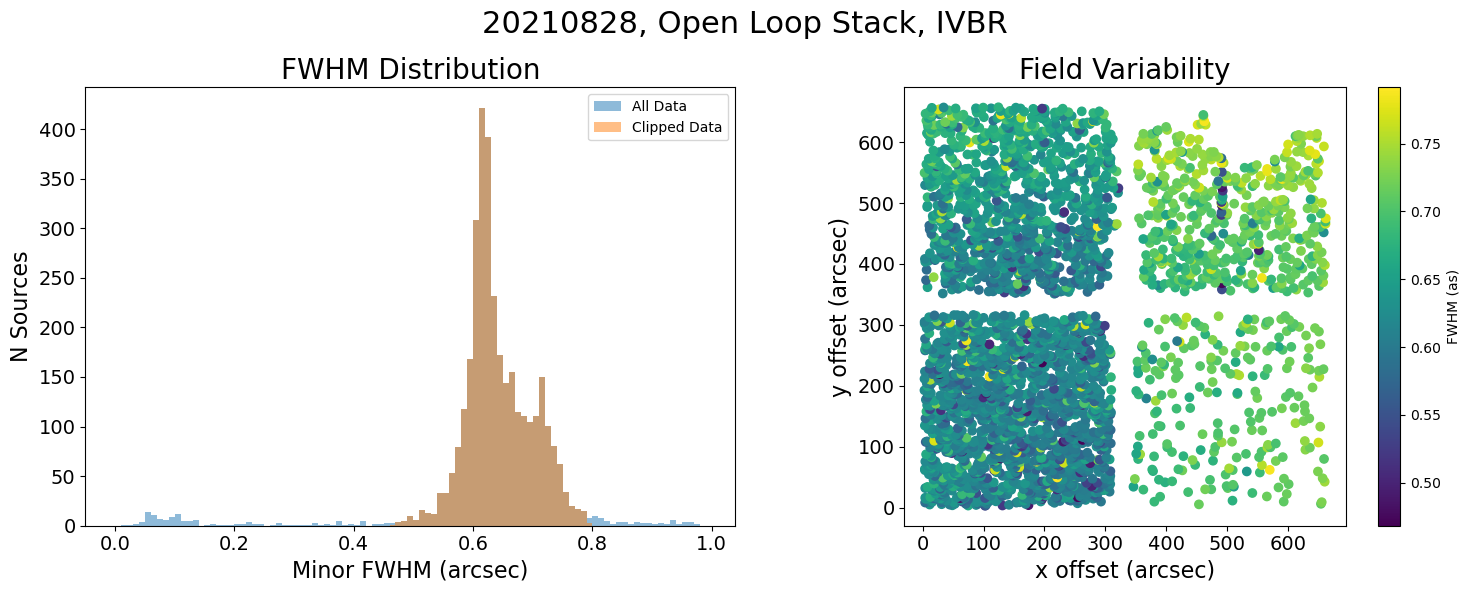

In [33]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop Stack, {filt}")

Median FWHM           = 0.698"
Median FWHM (clipped) = 0.699"
Mean FWHM             = 0.727"
Mean FWHM (clipped)   = 0.712"
Stddev FWHM           = 0.717"
Stddev FWHM (clipped) = 0.060"


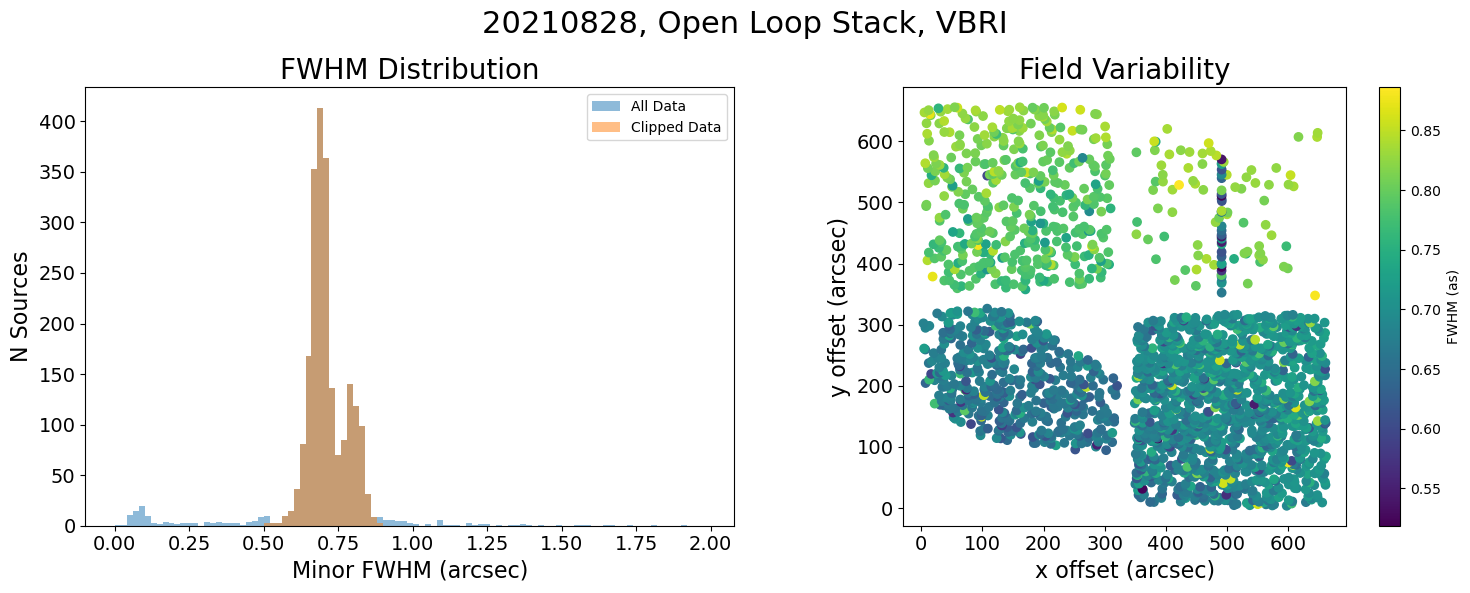

In [27]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop Stack, {filt}")

### Closed (LS)

Median FWHM           = 0.367"
Median FWHM (clipped) = 0.366"
Mean FWHM             = 0.778"
Mean FWHM (clipped)   = 0.376"
Stddev FWHM           = 4.547"
Stddev FWHM (clipped) = 0.069"


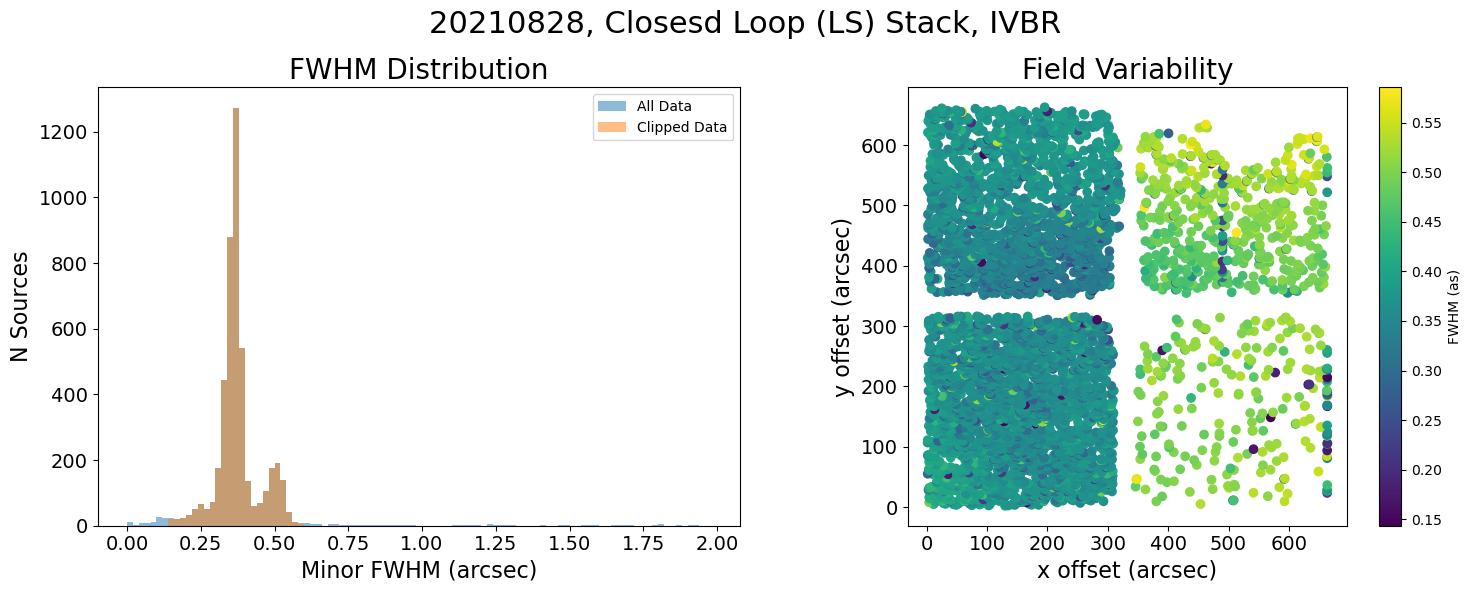

In [28]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closesd Loop (LS) Stack, {filt}")

Median FWHM           = 0.381"
Median FWHM (clipped) = 0.381"
Mean FWHM             = 0.507"
Mean FWHM (clipped)   = 0.396"
Stddev FWHM           = 4.990"
Stddev FWHM (clipped) = 0.066"


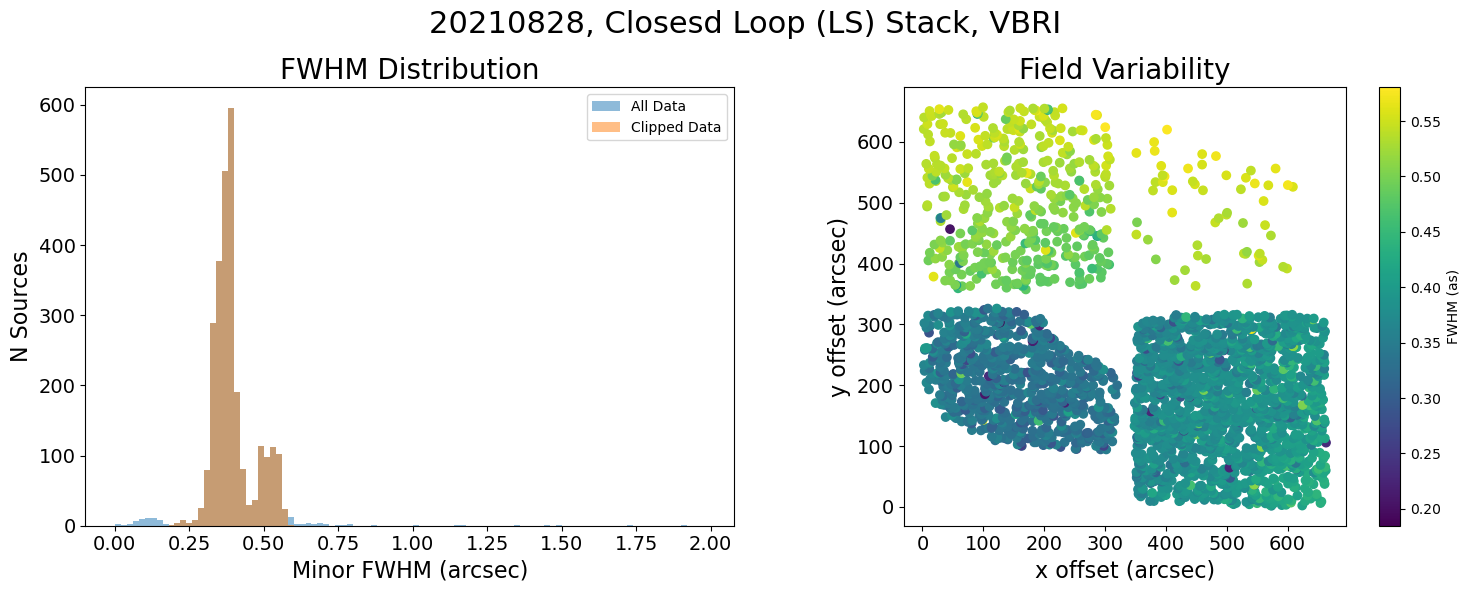

In [29]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closesd Loop (LS) Stack, {filt}")

### Closed (docz2)

Median FWHM           = 0.372"
Median FWHM (clipped) = 0.372"
Mean FWHM             = 0.425"
Mean FWHM (clipped)   = 0.387"
Stddev FWHM           = 0.812"
Stddev FWHM (clipped) = 0.060"


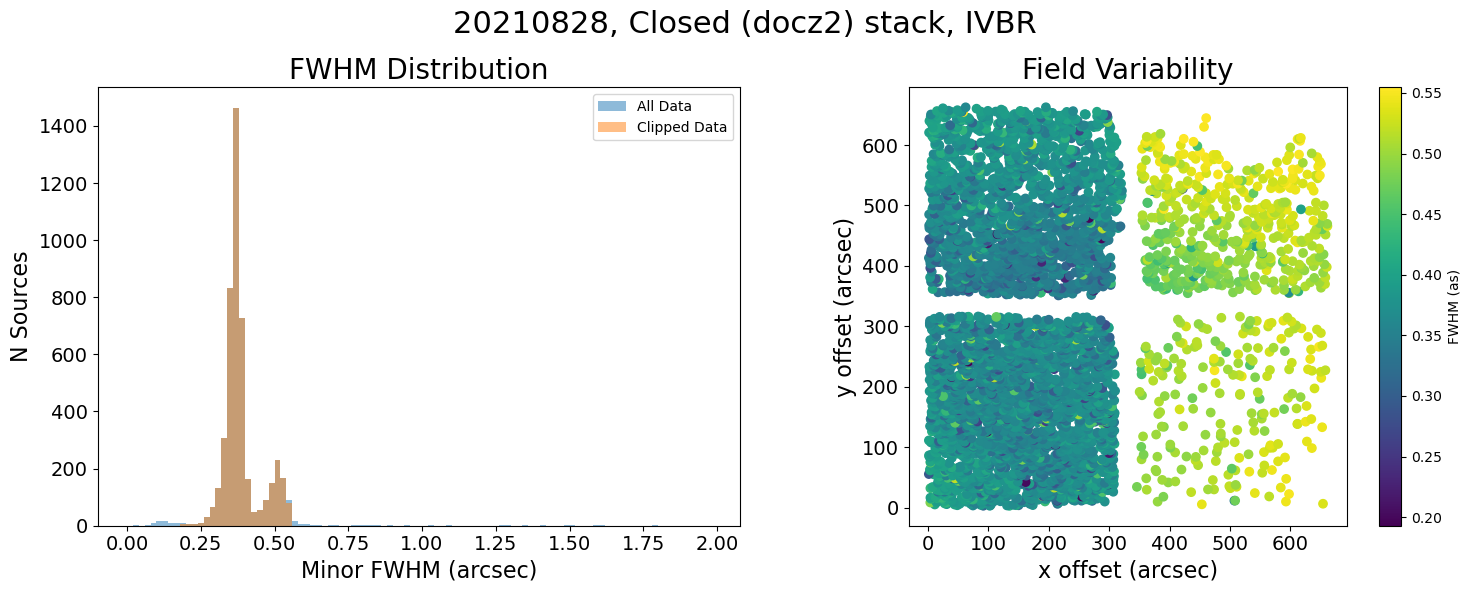

In [30]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

Median FWHM           = 0.417"
Median FWHM (clipped) = 0.417"
Mean FWHM             = 0.451"
Mean FWHM (clipped)   = 0.431"
Stddev FWHM           = 0.355"
Stddev FWHM (clipped) = 0.069"


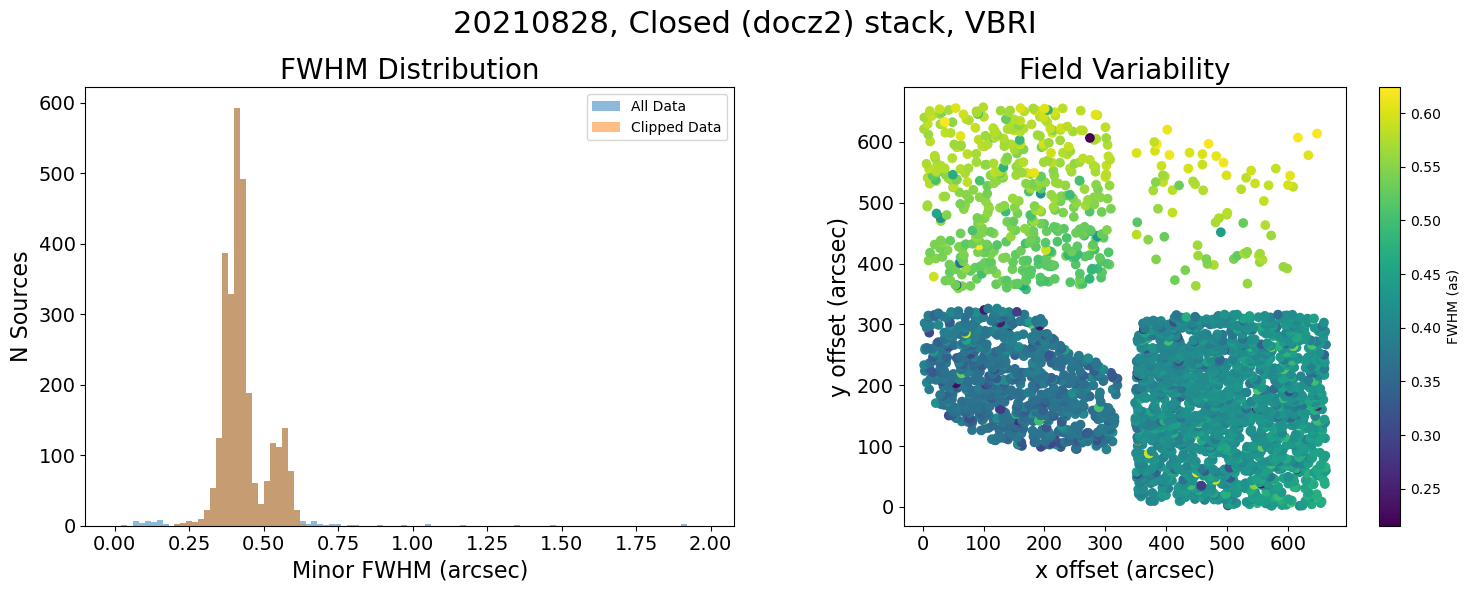

In [31]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

### Masks for this night's reduction

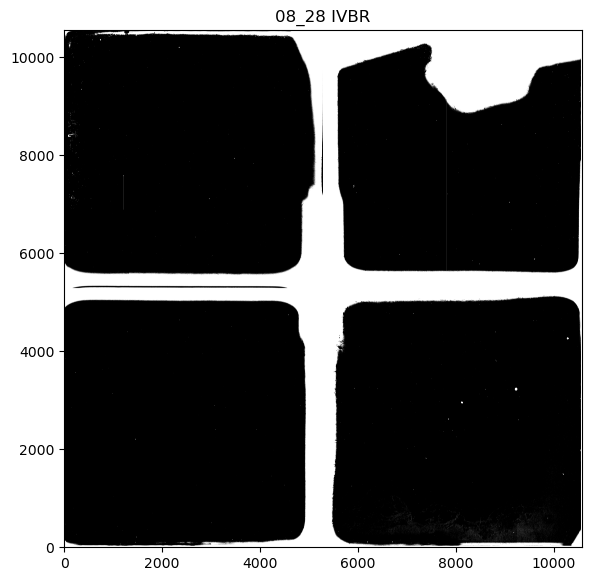

In [32]:
## What masks are we using? how are they different between orientations?
mask_dir = root_dir + "reduce/calib/"

hdul = fits.open(mask_dir +  "mask_IVBR.fits")

data = hdul[0].data

fig = plt.figure(figsize=(6,6))
plt.title("08_28 IVBR")
im = plt.imshow(data, origin ='lower', cmap='gray')
#plt.colorbar(im)
plt.tight_layout()
plt.show()
hdul.close()

In [87]:
##imp
import csv
import numpy as np
import pylab as plt
import scipy.spatial
from astropy.table import Table
import subprocess
import os, pdb
from imaka.reduce import util
from datetime import datetime
from matplotlib import dates as mp_dates
from matplotlib import ticker
import glob
import matplotlib.pyplot as plt
import matplotlib
from imaka.analysis import add_data
from astropy.io import fits
from pandas import read_csv
from astropy.io import fits
from imaka.analysis import moffat
from astropy.modeling import fitting
from astropy.stats import sigma_clip
import scipy.linalg
from matplotlib import cm
from astropy.stats import sigma_clipped_stats


In [97]:
def plot_var_small(img_file, starlist, title):

    # Read in stack and starlist
    img, hdr = fits.getdata(img_file, header=True)

    if starlist.endswith('txt'):
        stars = Table.read(starlist, format='ascii')
    else:
        stars = Table.read(starlist)

    # Check to see if we have already calculated Moffat parameters. 
    if 'mdp' in starlist:
        # Trim out negative beta values.
        idx = np.where((stars['Beta'] > 0) & (stars['Minor Alpha'] > 0))[0]
        stars = stars[idx]

        stars['Moffat FWHM'] = 2.0 * stars['Minor Alpha'] * np.sqrt((2.0**(1. / stars['Beta'])) - 1)
        idx = np.where((stars['Moffat FWHM'] > 0.25) )[0]
        stars = stars[idx]
        
        # # Get the brightest YY% stars
        # flux_percent = 0.2
        # flux_sorted = np.sort(stars['flux'])
        # flux_cut = flux_sorted[int(len(stars) * flux_percent)]

        # idx = np.where(stars['flux'] > flux_cut)[0]
        # stars = stars[idx]
        
        x_cents = stars['xcentroid'].data
        y_cents = stars['ycentroid'].data
        FWHMs = stars['Moffat FWHM'].data
        mags = stars['mag'].data

        # FWHMs = stars['fwhm_emp']
    else:
        raise RuntimeError('Table must include pre-calculate Moffat fits')

    # Fetch the plate scale for plotting
    img, hdr = fits.getdata(img_file, header=True)
    scale = util.get_plate_scale(img, hdr)

    # Convert everything into arcsec.
    x_cents *= scale
    y_cents *= scale
    FWHMs *= scale
    
    # Sigma clip data
    filt = sigma_clip(FWHMs, sigma=3, maxiters=5, copy=False)
    FWHMs_clip = FWHMs[~filt.mask]
    x_cents_clip = x_cents[~filt.mask]
    y_cents_clip = y_cents[~filt.mask]

    #plt.figure(1, figsize=(15,6))
    plt.figure(1, figsize=(7,6))

    #plt.subplot(121)
    #bins = np.arange(0,2, .02)
    #plt.hist(FWHMs, bins=bins, alpha=0.5, label='All Data')
    #plt.hist(FWHMs_clip, bins=bins, alpha=0.5, label='Clipped Data')
    #plt.xticks(fontsize=14); plt.yticks(fontsize=14)
    #plt.xlabel('Minor FWHM (arcsec)', fontsize=16)
    #plt.ylabel('N Sources', fontsize=16)
    #plt.title('FWHM Distribution', fontsize=20)
    #plt.legend()

    print('Median FWHM           = {0:.3f}"'.format(np.median(FWHMs)))
    print('Median FWHM (clipped) = {0:.3f}"'.format(np.median(FWHMs_clip)))
    print('Mean FWHM             = {0:.3f}"'.format(np.mean(FWHMs)))
    print('Mean FWHM (clipped)   = {0:.3f}"'.format(np.mean(FWHMs_clip)))
    print('Stddev FWHM           = {0:.3f}"'.format(np.std(FWHMs)))
    print('Stddev FWHM (clipped) = {0:.3f}"'.format(np.std(FWHMs_clip)))

    # Plot the FWHM over the field. First, determine the min/max on the colorscale.
    #plt.subplot(122)
    plt.scatter(x_cents_clip, y_cents_clip, c=FWHMs_clip,
                    vmin=0.25, vmax=FWHMs_clip.max(),
                    cmap = plt.cm.viridis, s=10)
    plt.xlabel('x offset (arcsec)', fontsize=16) 
    plt.ylabel('y offset (arcsec)', fontsize=16)
    #plt.title("Field Variability", fontsize=20)
    plt.colorbar(label='FWHM (as)')
    plt.xticks(fontsize=14); plt.yticks(fontsize=14)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.suptitle(title, fontsize=22)

    plt.tight_layout()

Median FWHM           = 0.381"
Median FWHM (clipped) = 0.381"
Mean FWHM             = 0.508"
Mean FWHM (clipped)   = 0.396"
Stddev FWHM           = 4.991"
Stddev FWHM (clipped) = 0.066"


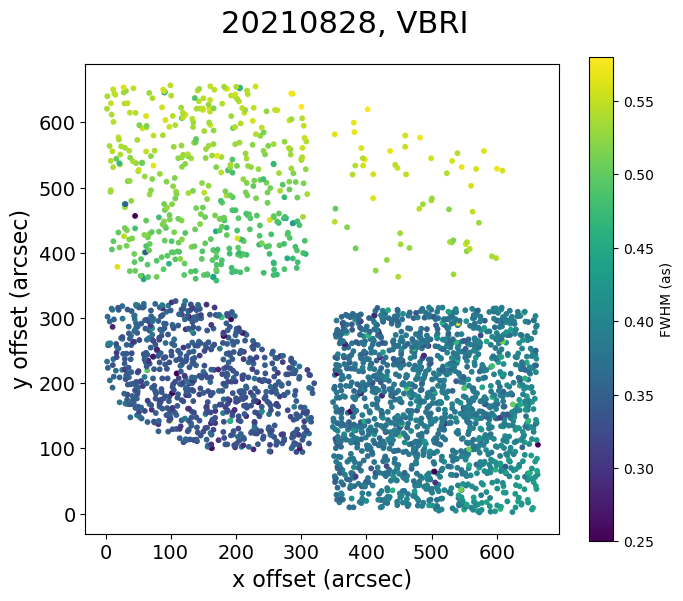

In [98]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_var_small(img_file, starlist, f"{night}, {filt}")

Median FWHM           = 0.367"
Median FWHM (clipped) = 0.366"
Mean FWHM             = 0.780"
Mean FWHM (clipped)   = 0.376"
Stddev FWHM           = 4.551"
Stddev FWHM (clipped) = 0.069"


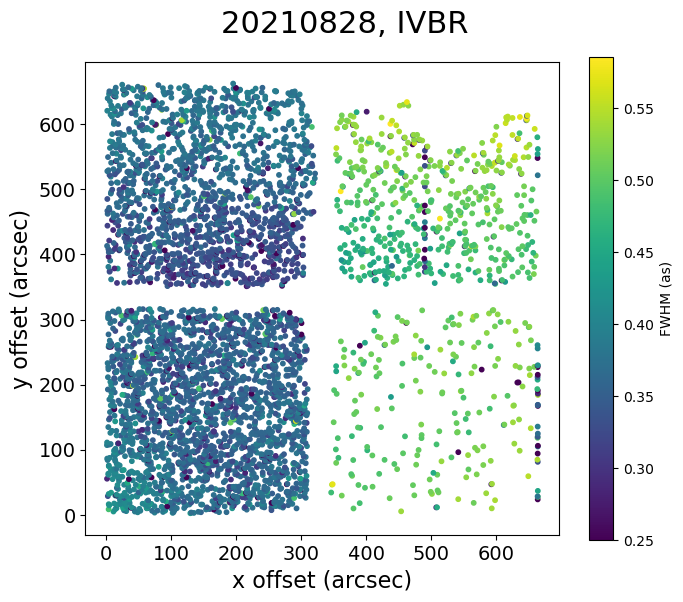

In [100]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_var_small(img_file, starlist, f"{night}, {filt}")